In [2]:
import numpy as np
from scipy import special
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Parametri log-normalne razdiobe prvog silaznog udara munje (informacije preuzete iz članka 1-s2.0-S0142061516314065-main.pdf)
I_mi = 31.1         # Medijan amplitude
s_ln_I = 0.484      # Standardna devijacija amplitude
tf_mi = 3.83        # Medijan vremena porasta
s_ln_tf = 0.553     # Standardna devijacija vremena porasta
rho_c = 0.47        # Korelacija između amplitde i vremena porasta za prvi silazni udar munje

Float64Index([30.900000000000027], dtype='float64')

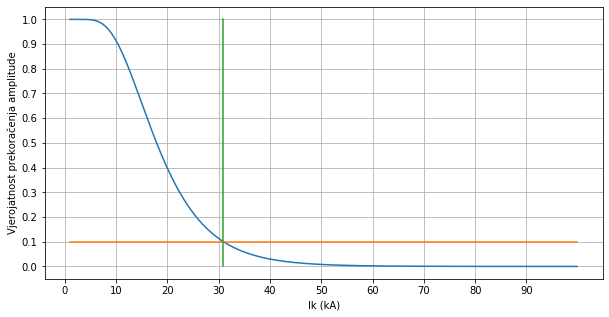

In [40]:
vj_prek = 0.1
plt.figure(figsize=(10,5))
tf = 1
Ik = np.arange(1,100,0.1)
b = np.log(I_mi) + rho_c*s_ln_I/s_ln_tf *(np.log(tf)-np.log(tf_mi))
s = s_ln_I*np.sqrt(1-rho_c**2)
u0 = (np.log(Ik)-b)/(np.sqrt(2)*s)
prob_dist = 0.5*special.erfc(u0)
konst = [vj_prek]*len(Ik)
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

df = pd.DataFrame(index=Ik, data=prob_dist)
Ig = df[df.values==find_nearest(prob_dist, vj_prek)].index

plt.plot(Ik, prob_dist)
plt.plot(Ik, konst)
plt.plot([Ig]*11, np.arange(0,1.1,0.1))
plt.xlabel('Ik (kA)')
plt.xticks(ticks=np.arange(0,100,10))
plt.ylabel('Vjerojatnost prekoračenja amplitude')
plt.yticks(ticks=np.arange(0,1.1,0.1))
plt.grid()
Ig